# Data Pre

# Data Preprocessing

- First section for Global Carbon Project/Budget (GCB)
    - Filter to years 1990-2020
    - Filters to only countries without missing data
    - Rename 'Total' Column to 'Total Carbon Emissions'
    - Two CSV files created: one UK specific. The other Global
- Second section for UK office of National Statistics (ONS)
    - Rename 'Total' Column to 'Total Energy'
    - Added an additional column of 'United Kingdom' for combining the datasets
    - Checked for missing values
- Third section merges the two datasets
    - Combined UK only data
    - Combined UK + World Data

In [46]:
# GCB: Select ALL countries from 1990-2020. Rename column. 
# new csv: /data/notebook_files/GCB_ALLcountry_energy_data_1990-2020.csv

import pandas as pd

df = pd.read_csv("/data/notebook_files/GCB2022v27_MtCO2_flat.csv")

#visualizing what countries are taken out
filtered_countries = df[~df["Year"].between(1990, 2020)]['Country'].unique()
remaining_countries = df[df["Year"].between(1990, 2020)]['Country'].unique()

#Filters
df_filtered = df[df["Year"].between(1990, 2020)]
df.rename(columns={'Total': 'Total Emissions'}, inplace=True)
df_filtered = df.dropna()

#new csv
df_filtered.to_csv("GCB_ALLcountry_energy_data_1990-2020.csv")


print("Filtered countries:")
print(filtered_countries)
print("Remaining countries:")
print(remaining_countries)

Filtered countries:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bonaire, Saint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Côte d'Ivoire"
 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'North Korea'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Micronesia (Federated States of)' 'Fiji' 'Finland' 'Panama Canal Zone'
 'France' 'French Equatorial Africa' '

In [47]:
# Select ONLY United Kingdom energy data for years with data 1990 - 2020
# New CSV = /data/notebook_files/GCB_UKonly_1990.2020.csv


df = pd.read_csv("/data/notebook_files/GCB_ALLcountry_energy_data_1990-2020.csv")

# select the years from 1990-2020 & UK as country
df_ukyear_filtered = df.loc[(df["Year"].between(1990, 2020)) & (df["Country"] == "United Kingdom")]

# save new CSV
df_ukyear_filtered.to_csv("GCB_UKonly_.csv")

In [48]:
# New column


# datafram
df = pd.read_csv('/data/notebook_files/UK_ONS.csv')

# Rename 'Total' column to 'Total Energy'
df.rename(columns={'Total_ONS': 'Total Energy'}, inplace=True)

# Add a new column 'Country' with 'United Kingdom'
df['Country'] = 'United Kingdom'

# Check for missing values
missing_data = df.isnull().any().any()
if missing_data:
    print("Missing values")
else:
    print("No missing values")


# Save to a new CSV file
df.to_csv('UK_ONS_filtered.csv', index=False)

No missing values


In [49]:
#UK Merge

# GCB World dataset
df1 = pd.read_csv('/data/notebook_files/GCB_UKonly_.csv')

# ONS dataset
df2 = pd.read_csv('/data/notebook_files/UK_ONS_filtered.csv')

# Merge the datasets based on 'Country' and 'Year'
combined_df = df1.merge(df2, on=['Country', 'Year'], how='left')

# combined csv
combined_df.to_csv('FINAL_UK.csv', index=False)

In [18]:
#Dropping unnamed columns and missing values

df = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Drop columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
if 'Unnamed: 0' in df.columns:
    df.drop(columns='Unnamed: 0', inplace=True)
if 'ISO 3166-1 alpha-3' in df.columns:
    df.drop(columns='ISO 3166-1 alpha-3', inplace=True)

#dropping missing values from renewables


# Save 
df.to_csv('/data/notebook_files/FINAL_UK.csv', index=False)

In [13]:
# dropping additional columns

data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Drop 
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'ISO 3166-1 alpha-3']
data = data.drop(columns=columns_to_drop)

# Save  to CSV
data.to_csv('/data/notebook_files/FINAL_UK.csv', index=False)


In [19]:
#Dropping unnamed columns

df = pd.read_csv('/data/notebook_files/FINAL_WORLD.csv')

# Drop columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
if 'Unnamed: 0' in df.columns:
    df.drop(columns='Unnamed: 0', inplace=True)
if 'ISO 3166-1 alpha-3' in df.columns:
    df.drop(columns='ISO 3166-1 alpha-3', inplace=True)


# Save 
df.to_csv('/data/notebook_files/FINAL_WORLD.csv', index=False)

In [20]:
#column names list 
import csv

def print_csv_column_names(csv_file):
    with open(csv_file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        columns = next(reader)
        return columns

if __name__ == '__main__':
    csv_file = '/data/notebook_files/FINAL_UK.csv'
    column_names = print_csv_column_names(csv_file)
    print(column_names)

['Country', 'Year', 'Total Emissions', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita', 'Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']


# SVR Model

# SVR Model

List of libraries used:

- pandas
- numpy
- matplotlib.pyplot
- sklearn.model_selection (train_test_split, cross_val_score, KFold, TimeSeriesSplit)
- sklearn.svm (SVR)
- sklearn.preprocessing (StandardScaler)
- sklearn.metrics (mean_squared_error, r2_score)
- seaborn (sns)

Mean Squared Error: 61.66183709922377
R-squared: 0.991092799424557


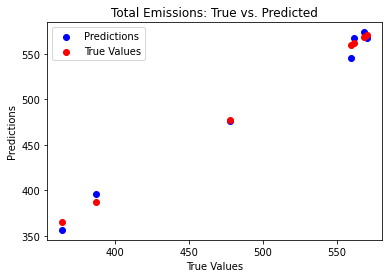

In [7]:
#SVR Model with linear kernel and all features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features]
y = data['Total Emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVR model with a linear kernel
svr = SVR(kernel='linear')

# Train the model on the training set
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot 
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.scatter(y_test, y_test, color='red', label='True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Total Emissions: True vs. Predicted')
plt.legend()
plt.show()

# SVR Feature Importance

Feature: Energy from renewable & waste sources, Score: 0.38972
Feature: Total Energy, Score: 0.05121
Feature: Fraction from renewable sources and waste, Score: 0.00071
Feature: Hydroelectric power, Score: 0.00856
Feature: Wind, wave, tidal, Score: 0.02657
Feature: Solar photovoltaic, Score: 0.00321
Feature: Geothermal aquifers, Score: 0.00000
Feature: Landfill gas, Score: 0.18510
Feature: Sewage gas, Score: 0.02160
Feature: Biogas from autogen, Score: 0.00233
Feature: Municipal solid waste (MSW), Score: 0.07678
Feature: Poultry litter, Score: 0.03789
Feature: Straw, Score: 0.00268
Feature: Wood, Score: 0.05454
Feature: Charcoal, Score: 0.00180
Feature: Liquid bio-fuels, Score: 0.02120
Feature: Bioethanol, Score: 0.06575
Feature: Biodiesel, Score: 0.02141
Feature: Biomass, Score: 0.02894


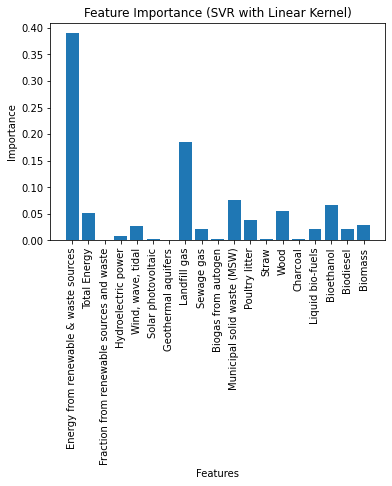

In [8]:
# SVR feature importance
# There was some variation while running these so I took the mean of running
# them 100 times. 



df = pd.read_csv("/data/notebook_files/FINAL_UK.csv")

# Select features and target variable
features = [
            'Energy from renewable & waste sources', 'Total Energy',
            'Fraction from renewable sources and waste', 'Hydroelectric power', 
            'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 
            'Landfill gas', 'Sewage gas', 'Biogas from autogen', 
            'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 
            'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', ]
target = 'Total Emissions'

X = df[features]
y = df[target]

# Define the model
model = SVR(kernel='linear')

# Initialize a list to store feature importances
importance_list = []

# Number of runs
n_runs = 100

# Perform feature importance analysis multiple times
for _ in range(n_runs):
    # Fit the model
    model.fit(X, y)

    # Get absolute weights for linear kernel SVR
    weights = np.abs(model.coef_[0])

    # Normalize the weights
    weights /= np.sum(weights)

    # Append feature importance to the list
    importance_list.append(weights)

# Compute the mean feature importance across runs
mean_importance = np.mean(importance_list, axis=0)

# Summarize feature importance
for i, v in enumerate(mean_importance):
    print('Feature: %s, Score: %.5f' % (features[i], v))

# Plot feature importance
plt.bar([x for x in range(len(mean_importance))], mean_importance)
plt.xticks(ticks=range(len(features)), labels=features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (SVR with Linear Kernel)')
plt.show()

# Checking Dataranges

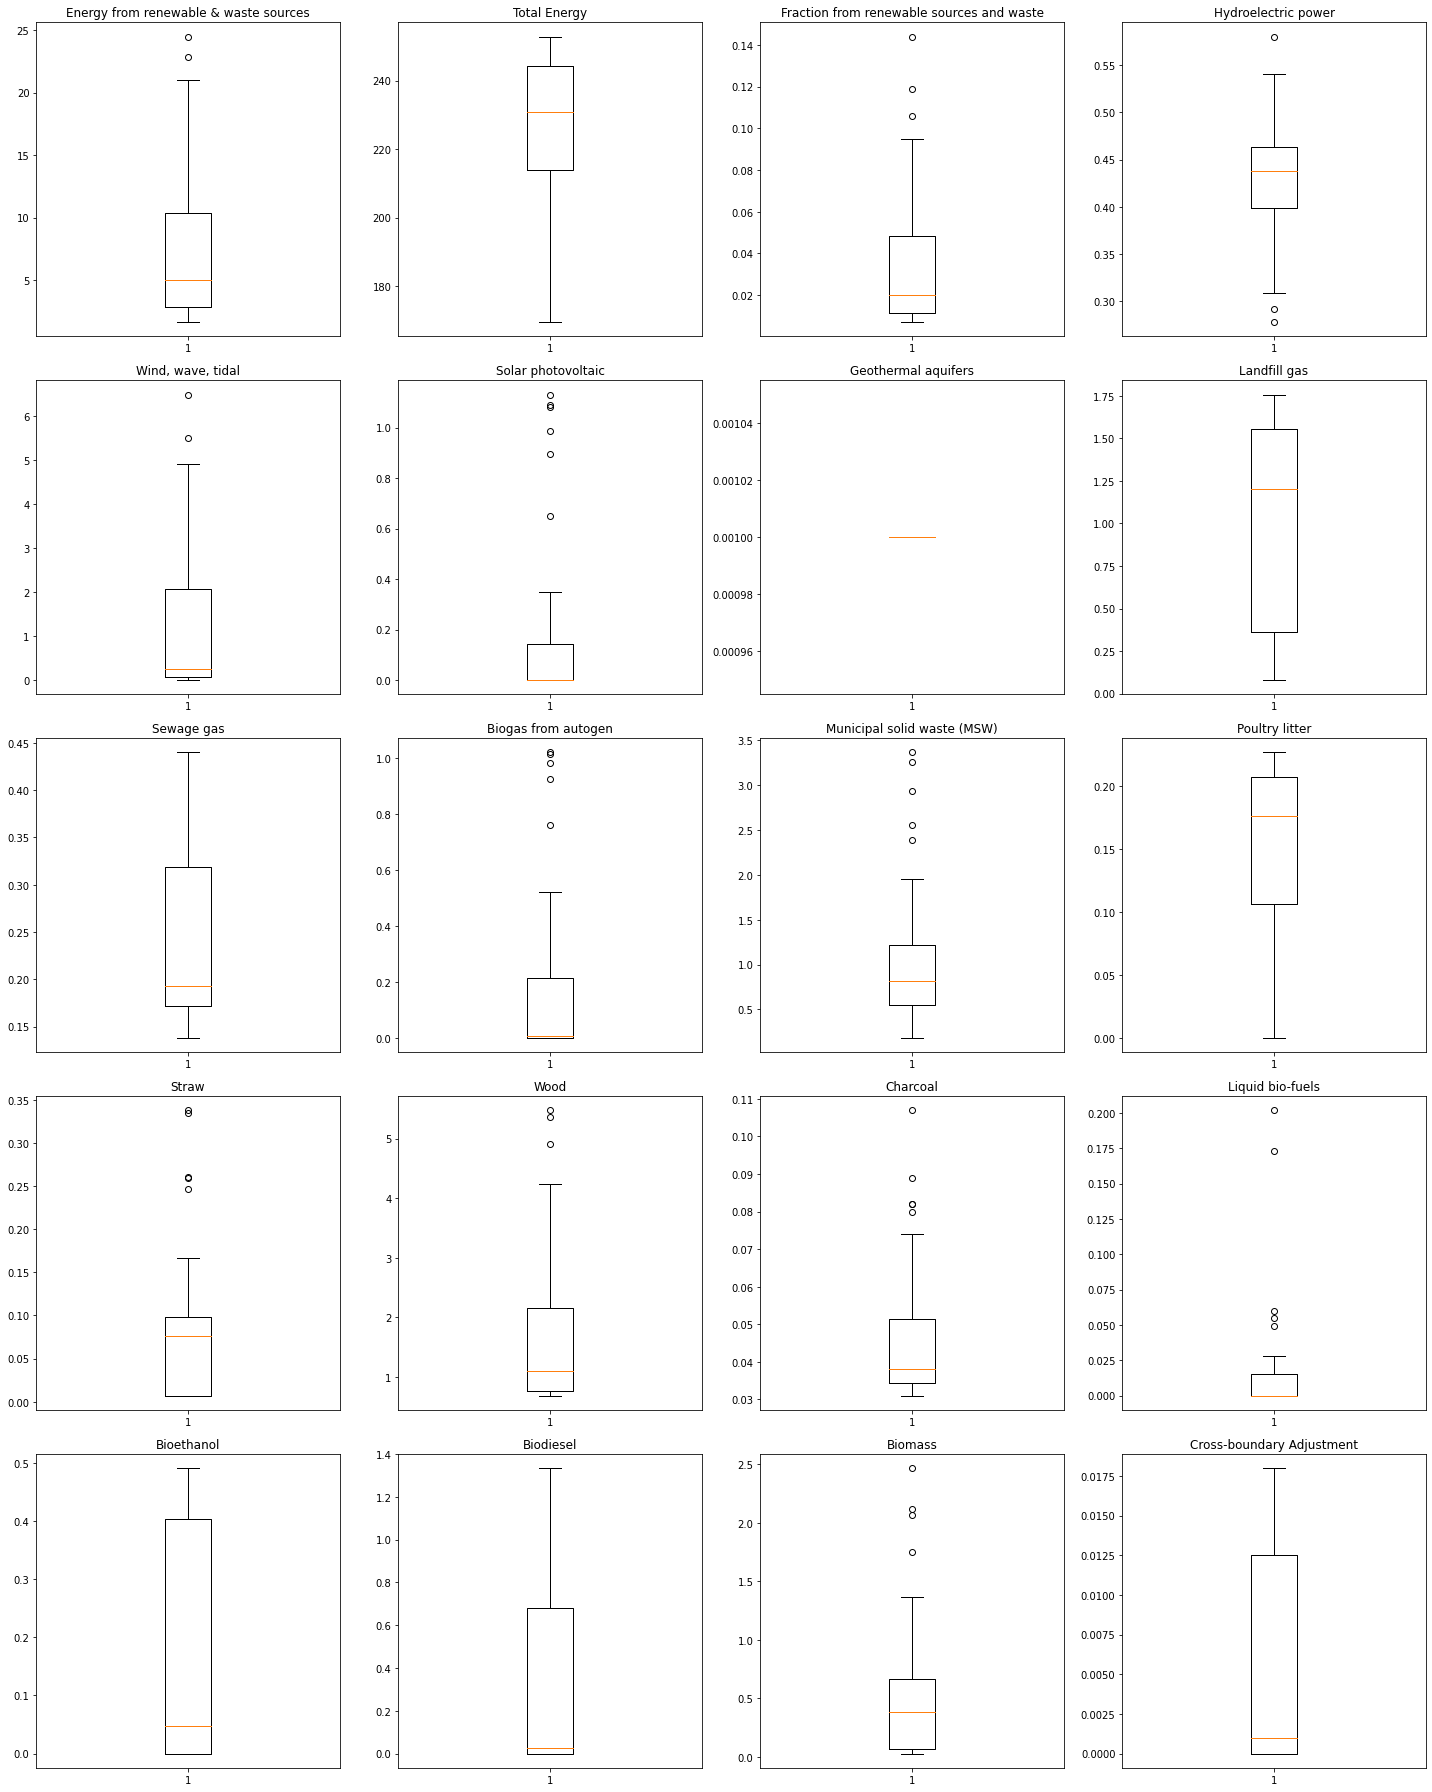

In [9]:
# Checking the dataranges for all features


df = pd.read_csv("/data/notebook_files/FINAL_UK.csv")

# Select features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 
            'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 
            'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 
            'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']

# Define the subplot grid dimensions
num_plots = len(features)
num_cols = 4
num_rows = num_plots // num_cols if num_plots % num_cols == 0 else num_plots // num_cols + 1

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))  # 5*num_rows adjusts the height of each row

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Plot a boxplot for each feature
for i, feature in enumerate(features):
    axes[i].boxplot(df[feature].dropna())
    axes[i].set_title(feature)

# Remove unused subplots
if num_plots % num_cols != 0:
    for ax in axes[num_plots:]:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()


# SVR model with 'random' 'intuitive' feature selection. Not as predictive

Mean Squared Error: 1482.173662037332
R-squared: 0.7858964520605959


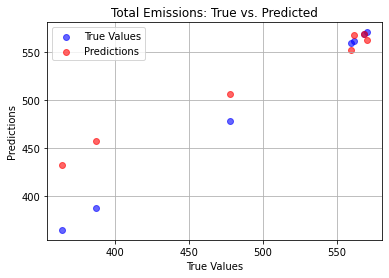

In [25]:
# SVR model with 'random' 'intuitive' feature selection. Not as predictive


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste']
X = data[features]
y = data['Total Emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVR model with a linear kernel
svr = SVR(kernel='linear')

# Train the model on the training set
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.scatter(y_test, y_test, c='blue', label='True Values', alpha=0.6)
plt.scatter(y_test, y_pred, c='red', label='Predictions', alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Total Emissions: True vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()

# SVR with Tabu search

Selected features: ['Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels']
R-squared: 0.9889945412504892
Mean Squared Error: 76.1874394616748


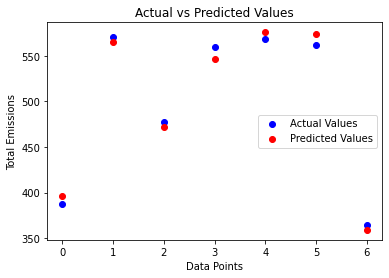

In [29]:
#SVR with Tabu search


data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Select the features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features]
y = data['Total Emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize for Tabu Search
n_features = len(features)
best_features = [1] * n_features  # start using all features
tabu_list = []

# Hyperparameters for Tabu Search
max_iter = 100  # maximum iterations
tabu_tenure = 10  # how long a feature will stay in the tabu list

for i in range(max_iter):
    # Select features not in the tabu list
    candidates = [best_features]
    for j in range(n_features):
        if j not in tabu_list:
            candidate = best_features.copy()
            candidate[j] = 1 - candidate[j]  # flip the j-th feature
            candidates.append(candidate)
    
    # Evaluate all candidates
    best_score = float('inf')
    for candidate in candidates:
        selected_features = [features[i] for i in range(n_features) if candidate[i]]
        X_train_selected = X_train[:, candidate]
        X_test_selected = X_test[:, candidate]
        
        # Train the model and compute error
        model = SVR(kernel='linear').fit(X_train_selected, y_train)
        y_pred = model.predict(X_test_selected)
        score = mean_squared_error(y_test, y_pred)
        
        # Update best score and best features
        if score < best_score:
            best_score = score
            best_features = candidate

    # Update tabu list
    if len(tabu_list) >= tabu_tenure:
        tabu_list.pop(0)
    tabu_list.append(best_features)

# Print selected features
selected_features = [features[i] for i in range(n_features) if best_features[i]]
print('Selected features:', selected_features)

# Get the selected features
X_train_selected = X_train[:, best_features]
X_test_selected = X_test[:, best_features]

# Train the SVR model using the selected features
model = SVR(kernel='linear')
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('Mean Squared Error:', mse)

# Plotting the predicted and actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Total Emissions')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# SVR with Greedy Search


Selected features: ['Sewage gas', 'Energy from renewable & waste sources', 'Biogas from autogen', 'Wind, wave, tidal', 'Total Energy', 'Liquid bio-fuels']
R-squared: 0.9973508020703704
Mean Squared Error: 18.33959051408225


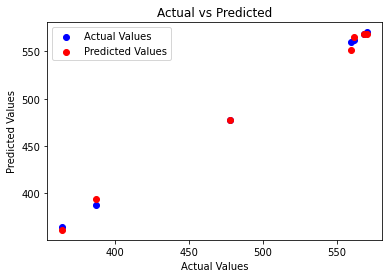

In [22]:
# SVR with Greedy search


data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Select the features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features]
y = data['Total Emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize for Greedy Search
n_features = len(features)
selected_features = []  # start with no features
best_score = float('inf')  # initialize with maximum error

for _ in range(n_features):
    best_score_new = float('inf')

    for i in range(n_features):
        if i not in selected_features:
            candidate_features = selected_features + [i]
            X_train_selected = X_train[:, candidate_features]
            X_test_selected = X_test[:, candidate_features]

            # Train the model and compute error
            model = SVR(kernel='linear').fit(X_train_selected, y_train)
            y_pred = model.predict(X_test_selected)
            score = mean_squared_error(y_test, y_pred)

            # Update the best new score and the best new feature
            if score < best_score_new:
                best_score_new = score
                best_feature_new = i

    # If no improvement, break
    if best_score_new >= best_score:
        break

    # Otherwise, add the new feature to the selected features
    selected_features.append(best_feature_new)
    best_score = best_score_new

# Print selected features
print('Selected features:', [features[i] for i in selected_features])

# Get the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train the SVR model using the selected features
model = SVR(kernel='linear')
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('Mean Squared Error:', mse)

# Plot the results
plt.scatter(y_test, y_test, c='blue', label='Actual Values')
plt.scatter(y_test, y_pred, c='red', label='Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# K-fold cross validations

In [30]:
# K-fold cross validation for greedy approach


from sklearn.model_selection import cross_val_score, KFold


data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Select the features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features]
y = data['Total Emissions']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize for Greedy Search
n_features = len(features)
selected_features = []  # start with no features
best_score = float('inf')  # initialize with maximum error

for _ in range(n_features):
    best_score_new = float('inf')

    for i in range(n_features):
        if i not in selected_features:
            candidate_features = selected_features + [i]
            X_selected = X_scaled[:, candidate_features]

            # Train the model and compute error using cross-validation
            model = SVR(kernel='linear')
            scores = cross_val_score(model, X_selected, y, cv=10, scoring='neg_mean_squared_error')

            # Average MSE scores
            score = -1 * scores.mean()

            # Update the best new score and the best new feature
            if score < best_score_new:
                best_score_new = score
                best_feature_new = i

    # If adding a new feature does not improve the performance, stop
    if best_score_new >= best_score:
        break

    # Otherwise, add the new feature to the selected features
    selected_features.append(best_feature_new)
    best_score = best_score_new

# Print selected features
print('Selected features:', [features[i] for i in selected_features])

# Train final model on all data with selected features
X_selected = X_scaled[:, selected_features]
model = SVR(kernel='linear')
model.fit(X_selected, y)

# Perform cross-validation to evaluate model
scores = cross_val_score(model, X_selected, y, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X_selected, y, cv=10, scoring='r2')

print('Cross-validated MSE:', -1 * scores.mean())
print('Cross-validated R^2:', r2_scores.mean())


Selected features: ['Sewage gas', 'Bioethanol', 'Wind, wave, tidal', 'Biogas from autogen', 'Solar photovoltaic', 'Municipal solid waste (MSW)', 'Fraction from renewable sources and waste', 'Liquid bio-fuels', 'Hydroelectric power', 'Poultry litter', 'Energy from renewable & waste sources', 'Total Energy']
Cross-validated MSE: 132.76168581495318
Cross-validated R^2: -3.8279316747407


Cross-validated MSE: 177.7364352964788
Cross-validated R^2: -6.734964804667747


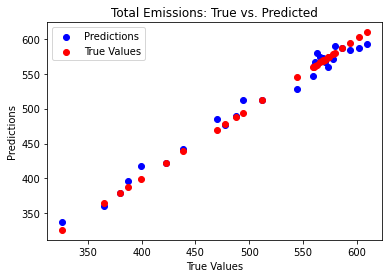

In [25]:
# K-fold cross validation SVR without optimisation


data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Select the features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features]
y = data['Total Emissions']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the SVR model with a linear kernel
svr = SVR(kernel='linear')

# Train the model on the whole dataset
svr.fit(X_scaled, y)

# Perform cross-validation to evaluate model
scores = cross_val_score(svr, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(svr, X_scaled, y, cv=10, scoring='r2')

print('Cross-validated MSE:', -1 * scores.mean())
print('Cross-validated R^2:', r2_scores.mean())

# Make predictions on the whole dataset
y_pred = svr.predict(X_scaled)

# Plot the results
plt.scatter(y, y_pred, color='blue', label='Predictions')
plt.scatter(y, y, color='red', label='True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Total Emissions: True vs. Predicted')
plt.legend()
plt.show()

Cross-validated MSE: 2249.18909830411
Cross-validated R^2: -15.881981568646182


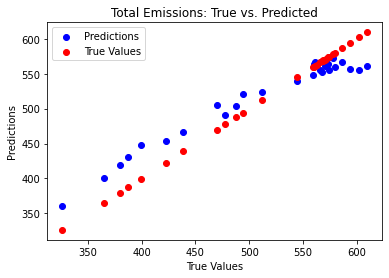

In [31]:
# K-fold cross validation  or 'random' 'intuitive' feature selection


data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Select the features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste']
X = data[features]
y = data['Total Emissions']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the SVR model with a linear kernel
svr = SVR(kernel='linear')

# Train the model on the whole dataset
svr.fit(X_scaled, y)

# Perform cross-validation to evaluate model
scores = cross_val_score(svr, X_scaled, y, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(svr, X_scaled, y, cv=10, scoring='r2')

print('Cross-validated MSE:', -1 * scores.mean())
print('Cross-validated R^2:', r2_scores.mean())

# Make predictions on the whole dataset
y_pred = svr.predict(X_scaled)

# Plot the results
plt.scatter(y, y_pred, color='blue', label='Predictions')
plt.scatter(y, y, color='red', label='True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Total Emissions: True vs. Predicted')
plt.legend()
plt.show()

In [43]:
# K-fold of SVR with Tabu search


data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features]
y = data['Total Emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_features = len(features)
best_features = [1] * n_features
tabu_list = []

max_iter = 100
tabu_tenure = 10

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

for i in range(max_iter):
    candidates = [best_features]
    for j in range(n_features):
        if j not in tabu_list:
            candidate = best_features.copy()
            candidate[j] = 1 - candidate[j]
            candidates.append(candidate)
    
    best_score = float('inf')
    for candidate in candidates:
        selected_features = [features[i] for i in range(n_features) if candidate[i]]
        X_train_selected = X_train[:, candidate]

        model = SVR(kernel='linear')
        
        mse_scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='neg_mean_squared_error')
        mse_scores = -mse_scores
        score = np.mean(mse_scores)
        
        if score < best_score:
            best_score = score
            best_features = candidate

    if len(tabu_list) >= tabu_tenure:
        tabu_list.pop(0)
    tabu_list.append(best_features)

selected_features = [features[i] for i in range(n_features) if best_features[i]]
print('Selected features:', selected_features)

X_train_selected = X_train[:, best_features]
X_test_selected = X_test[:, best_features]

model = SVR(kernel='linear')
model.fit(X_train_selected, y_train)

mse_scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = -mse_scores
print('Mean MSE across all folds:', np.mean(mse_scores))

r2_scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='r2')
print('Mean R-squared across all folds:', np.mean(r2_scores))

Selected features: ['Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels']
Mean MSE across all folds: 286.4127016478953
Mean R-squared across all folds: -0.23045438949980893


# Data Scaling

In [39]:
#Scaling the data with a table
import pandas as pd
from sklearn.preprocessing import StandardScaler

import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# columns for scaling 
feature_columns = data.columns.drop(['Total Emissions', 'Country'])
features = data[feature_columns]

# scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert to df
scaled_data = pd.DataFrame(scaled_features, columns=[f'scaled_{col}' for col in feature_columns])

# Concatenate for comparison
comparison_data = pd.concat([features.reset_index(drop=True), scaled_data.reset_index(drop=True)], axis=1)

# Print the comparison table
print(comparison_data)

    Year        Coal         Oil         Gas    Cement   Flaring     Other  \
0   1990  252.689667  217.799809  113.517625  7.295263  6.787080  3.855634   
1   1991  253.622509  218.390340  121.693416  5.994176  6.260327  3.451905   
2   1992  237.746940  218.446760  122.295506  5.456386  6.444191  3.456140   
3   1993  207.685853  219.163179  137.590681  5.524922  6.635621  3.012280   
4   1994  195.375628  215.736312  145.455289  6.367810  7.425508  3.656342   
5   1995  181.699266  211.595054  154.253805  6.284903  8.341181  3.984749   
6   1996  173.071522  216.892453  177.542516  6.416449  8.706841  4.130894   
7   1997  154.728657  207.743352  182.886752  6.710493  7.210749  3.428103   
8   1998  154.087839  204.933885  191.361381  6.838169  7.448362  3.874060   
9   1999  138.313400  201.663020  205.231254  6.530861  6.170552  3.740487   
10  2000  144.443080  198.237954  210.131006  6.331884  6.446023  3.443769   
11  2001  153.533658  198.650759  210.160357  5.843838  6.493080

# Nonlinear kernel SVR attempts: One with hyperparameter overfitting

In [14]:
# Nonlinear SVR kernel with ALL features and no optimisation.
# I tried many versions of this but couldn't seem to get it right
# Mean Squared Error: 6131.9479224840115
# R-squared: -8.845598592882972
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# dataset
data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')


# Feature Selection excluding 'Total Emissions' and 'Country'
feature_columns = data.columns.drop(['Total Emissions', 'Country'])
features = data[feature_columns]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training, validation, and testing sets
X = scaled_features
y = data['Total Emissions'].values
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Create the SVR model
svr = SVR()

# Train the model on the training set
svr.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svr.predict(X_val)

# Evaluate the performance
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# If you want to see the names of the features being used
print("Features used:", feature_columns.tolist())

Mean Squared Error: 6131.9479224840115
R-squared: -8.845598592882972
Features used: ['Year', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other', 'Per Capita', 'Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']


In [10]:
# Overfitting nonlinear SVR with hyperparameters

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Select the features that represent parts of total emissions
features = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']

# X is the feature matrix and y is the target variable
X = data[features].values
y = data['Total Emissions'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Best hyperparameters from tuning
best_params = {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}

# Create the SVR model with the best hyperparameters
svr = SVR(C=best_params['C'], epsilon=best_params['epsilon'], kernel=best_params['kernel'])

# Iterate through the time-based splits
for train_index, test_index in tscv.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the training set
    svr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svr.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

Mean Squared Error: 171.9364909394531
R-squared: -1.1146531818173755
Mean Squared Error: 0.00029697705303428505
R-squared: 0.9999912655098255
Mean Squared Error: 0.002016435337008738
R-squared: 0.9999974695405557
Mean Squared Error: 0.0009192106800819201
R-squared: 0.9999984754626406
Mean Squared Error: 0.0005427345143710866
R-squared: 0.9999991497115455


# Hypothetical

# Hypothetical Questions Using the Model

In [8]:
#What happens if you double renewable energy?

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Select the features
features = ['Energy from renewable & waste sources', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features]
y = data['Total Emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVR model with a linear kernel
svr = SVR(kernel='linear')

# Train the model on the training set
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate predicted total emissions without doubling renewable sources
y_pred_original = svr.predict(X_test_scaled)

# Double the energy from renewable & waste sources
X_modified = X.copy()
X_modified['Energy from renewable & waste sources'] *= 2

# Scaling the modified features
X_modified_scaled = scaler.transform(X_modified)

# Make predictions on the modified data
y_pred_modified = svr.predict(X_modified_scaled)

# Calculate predicted total emissions after doubling 
predicted_emissions_original = y_pred_original[-1]  
predicted_emissions_modified = y_pred_modified[-1]  

# Calculate percentage reduction in emissions
percentage_reduction = (predicted_emissions_original - predicted_emissions_modified) / predicted_emissions_original * 100

print(f'Predicted Total Emissions (without doubling renewable sources): {predicted_emissions_original}')
print(f'Predicted Total Emissions (with doubling renewable sources): {predicted_emissions_modified}')
print(f'Percentage Reduction in Emissions: {percentage_reduction:.2f}%')

Mean Squared Error: 69.0934875087368
R-squared: 0.9900192796606617
Predicted Total Emissions (without doubling renewable sources): 355.92916018290487
Predicted Total Emissions (with doubling renewable sources): 319.65658177813555
Percentage Reduction in Emissions: 10.19%


Mean Squared Error: 61.66183709922377
R-squared: 0.991092799424557


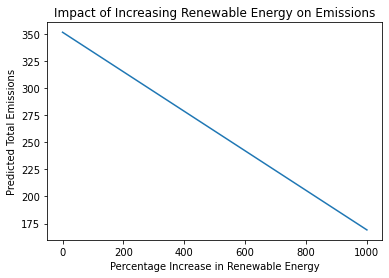

In [10]:
# increasing renewables by 1000 percent



data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features]
y = data['Total Emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Initialize lists to store the results
percent_increase = []
predicted_emissions = []

# Increment the renewable energy from 0% to 1000%
for i in range(1001):
    # Modify the features by increasing renewable energy
    X_modified = X.copy()
    X_modified['Energy from renewable & waste sources'] *= i / 100
    
    # Scaling the modified features
    X_modified_scaled = scaler.transform(X_modified)
    
    # Make predictions on the modified data
    y_pred_modified = svr.predict(X_modified_scaled)
    
    # Calculate predicted total emissions
    predicted_emissions.append(y_pred_modified[-1])  # Assuming the last prediction corresponds to the modified data
    
    # Calculate percentage increase in renewable energy
    percent_increase.append(i)

# Plot the results
plt.plot(percent_increase, predicted_emissions)
plt.xlabel('Percentage Increase in Renewable Energy')
plt.ylabel('Predicted Total Emissions')
plt.title('Impact of Increasing Renewable Energy on Emissions')
plt.show()

Mean Squared Error: 61.66183709922377
R-squared: 0.991092799424557
                        Feature  Impact on Emissions
12             Liquid bio-fuels           519.560570
3           Geothermal aquifers           517.924521
2            Solar photovoltaic           515.822569
6           Biogas from autogen           515.450520
11                     Charcoal           514.520256
15                      Biomass           514.380914
1             Wind, wave, tidal           514.354448
14                    Biodiesel           514.153077
9                         Straw           513.812226
13                   Bioethanol           513.563035
4                  Landfill gas           512.389075
10                         Wood           512.066114
7   Municipal solid waste (MSW)           511.442709
8                Poultry litter           503.606901
5                    Sewage gas           501.318875
0           Hydroelectric power           484.117509


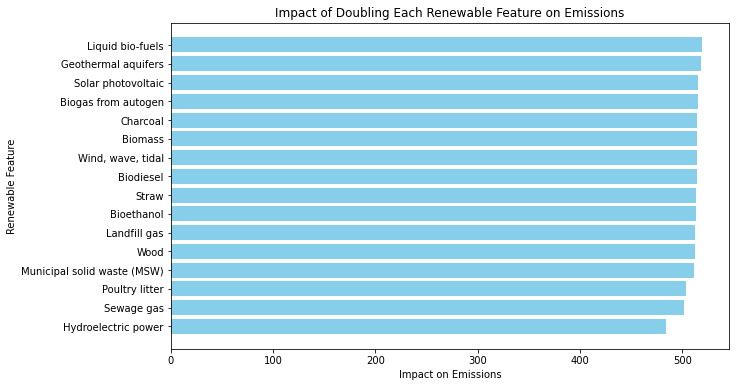

In [11]:
# Impact of different renwables on carbon emissions


data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Select features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features].copy()
y = data['Total Emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVR model with a linear kernel
svr = SVR(kernel='linear')

# Train the model on the training set
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Initialize lists to store the results
renewable_features = ['Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass']
impact_on_emissions = []

# For each renewable feature
for feature in renewable_features:
    # Store original feature values for later use
    original_feature_values = X.loc[:, feature].copy()
    
    # Modify the features by doubling the selected feature
    X.loc[:, feature] = original_feature_values * 2
    
    # Scaling the modified features
    X_scaled = scaler.transform(X)
    
    # Make predictions on the modified data
    y_pred_modified = svr.predict(X_scaled)
    
    # Calculate the average predicted emissions
    avg_predicted_emissions = np.mean(y_pred_modified)
    
    # Store the impact on emissions
    impact_on_emissions.append(avg_predicted_emissions)
    
    # Restore original feature values
    X.loc[:, feature] = original_feature_values

# dataframe to store the results
df_impact = pd.DataFrame({
    'Feature': renewable_features,
    'Impact on Emissions': impact_on_emissions
})

# Sort the dataframe 
df_impact.sort_values('Impact on Emissions', ascending=False, inplace=True)

# Display the dataframe
print(df_impact)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(df_impact['Feature'], df_impact['Impact on Emissions'], color='skyblue')
plt.xlabel('Impact on Emissions')
plt.ylabel('Renewable Feature')
plt.title('Impact of Doubling Each Renewable Feature on Emissions')
plt.gca().invert_yaxis()
plt.show()

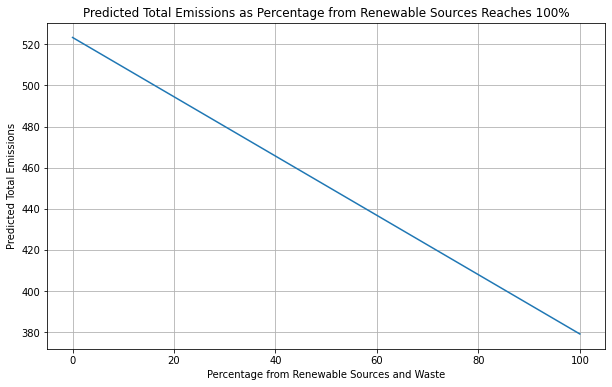

In [12]:
# What happens as the percentage from renewables reaches 100 percent?


data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Select the features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features].copy()
y = data['Total Emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVR model with a linear kernel
svr = SVR(kernel='linear')

# Train the model on the training set
svr.fit(X_train_scaled, y_train)

# Initialize lists to store the results
percent_renewable = list(range(0, 101, 5))
predicted_emissions = []

# For each percentage from 0 to 100
for percent in percent_renewable:
    # Modify the 'Fraction from renewable sources and waste' to the current percentage
    X.loc[:, 'Fraction from renewable sources and waste'] = percent / 100.0
    
    # Scaling the modified features
    X_scaled = scaler.transform(X)
    
    # Make predictions on the modified data
    y_pred_modified = svr.predict(X_scaled)
    
    # Calculate the average predicted emissions
    avg_predicted_emissions = np.mean(y_pred_modified)
    
    # Store the average predicted emissions
    predicted_emissions.append(avg_predicted_emissions)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(percent_renewable, predicted_emissions)
plt.xlabel('Percentage from Renewable Sources and Waste')
plt.ylabel('Predicted Total Emissions')
plt.title('Predicted Total Emissions as Percentage from Renewable Sources Reaches 100%')
plt.grid(True)
plt.show()

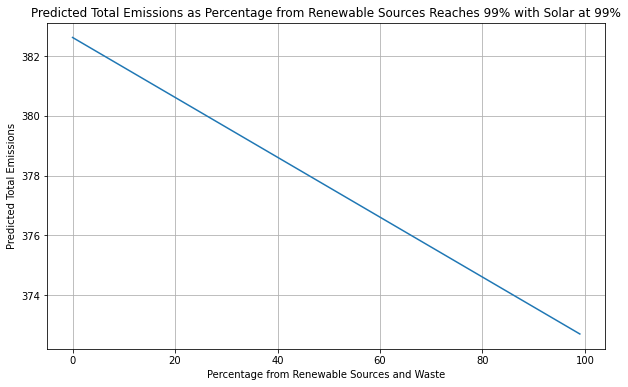

In [1]:
#99 Percent solar with 99 percent renewable

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Read the dataset
data = pd.read_csv('/data/notebook_files/FINAL_UK.csv')

# Select the features
features = ['Energy from renewable & waste sources', 'Total Energy', 'Fraction from renewable sources and waste', 'Hydroelectric power', 'Wind, wave, tidal', 'Solar photovoltaic', 'Geothermal aquifers', 'Landfill gas', 'Sewage gas', 'Biogas from autogen', 'Municipal solid waste (MSW)', 'Poultry litter', 'Straw', 'Wood', 'Charcoal', 'Liquid bio-fuels', 'Bioethanol', 'Biodiesel', 'Biomass', 'Cross-boundary Adjustment']
X = data[features].copy()
y = data['Total Emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SVR model with a linear kernel
svr = SVR(kernel='linear')

# Train the model on the training set
svr.fit(X_train_scaled, y_train)

# Initialize lists to store the results
percent_renewable = list(range(0, 100, 1))
predicted_emissions = []

# For each percentage from 0 to 99
for percent in percent_renewable:
    # Modify the 'Fraction from renewable sources and waste' to 99%
    X.loc[:, 'Fraction from renewable sources and waste'] = 0.99
    
    # Modify the 'Solar photovoltaic' feature to the current percentage
    X.loc[:, 'Solar photovoltaic'] = percent / 100.0
    
    # Scaling the modified features
    X_scaled = scaler.transform(X)
    
    # Make predictions on the modified data
    y_pred_modified = svr.predict(X_scaled)
    
    # Calculate the average predicted emissions
    avg_predicted_emissions = np.mean(y_pred_modified)
    
    # Store the average predicted emissions
    predicted_emissions.append(avg_predicted_emissions)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(percent_renewable, predicted_emissions)
plt.xlabel('Percentage from Renewable Sources and Waste')
plt.ylabel('Predicted Total Emissions')
plt.title('Predicted Total Emissions as Percentage from Renewable Sources Reaches 99% with Solar at 99%')
plt.grid(True)
plt.show()

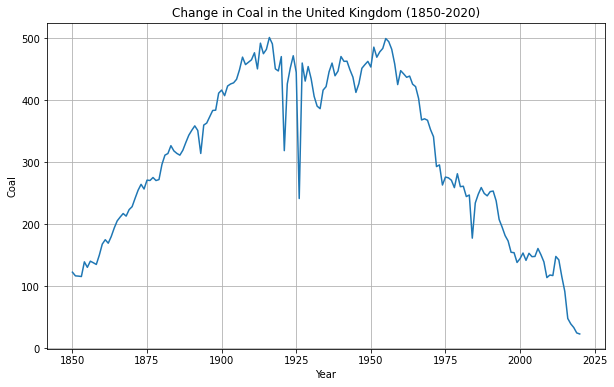

In [17]:
# Coal Emissions for the UK

import seaborn as sns

df = pd.read_csv('/data/notebook_files/GCB2022v27_MtCO2_flat.csv')

# Filter data for 'United Kingdom'
uk_data = df[df['Country'] == 'United Kingdom']

# Further filter the data for the period 1850-2020
uk_data = uk_data[(uk_data['Year'] >= 1850) & (uk_data['Year'] <= 2020)]

# Plotting the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=uk_data, x='Year', y='Coal')

plt.title('Change in Coal in the United Kingdom (1850-2020)')
plt.xlabel('Year')
plt.ylabel('Coal')
plt.grid(True)
plt.show()